<a href="https://colab.research.google.com/github/Ikramettiache/Tp-TextMining/blob/main/TP7_Ikrame_Ettiache.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run in python console
import nltk; 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.__version__

'3.2.5'

In [ ]:
!pip install pyLDAvis

In [ ]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
import pandas as pd
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

###**Importation de la base Newsgroups Data**

In [ ]:
# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


content  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   

            target_names  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space

**Nettoyage du corpus**

In [ ]:
corpus = df.content.values.tolist()
data = df['content'].tolist()

In [ ]:
corpus


In [ ]:
sent

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

Dans cette partie, on a utilisé gensim bibliotheque pour faire la tokenization.
On pourrait aussi utiliser autre méthode comme :

*   nltk.tokenize import word_tokenize
*   token.nlp(doc) avec la bibliothèque Spacy


In [ ]:
from pprint import pprint

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'"," ", sent) for sent in data]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  
        # deacc=True removes punctuations
        #yield generate 

data_words = list(sent_to_words(data))
print(data_words[:1])


In [ ]:
data_words[:5]

**Créer Bigram & Trigram Models**

In [ ]:
bigram = gensim.models.Phrases(data_words)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100) 

In [ ]:
print(trigram[data_words[0]])

['from', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting', 'host_rac', 'wam', 'umd', 'edu', 'organization_university', 'of', 'maryland_college', 'park', 'lines', 'was_wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten_me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports_car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in_addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
#simple preprocess for tokenize
#nltk.lemmatize aussi pour peut etre utiliser
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['thing', 'car', 'nntp_posting', 'host_rac', 'park', 'line', 'wonder', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'look', 'late_early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'name', 'engine', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'thank', 'bring', 'neighborhood', 'lerxst']]


 **Topic Medeling avec LSI**


In [ ]:
# Create Dictionary
#import gensim.corpora as corpora
id2word = corpora.Dictionary(data_lemmatized)
#chaque mot et son numero representant (index)
id2word.token2id

{'addition': 0,
 'body': 1,
 'bricklin': 2,
 'bring': 3,
 'call': 4,
 'car': 5,
 'could': 6,
 'day': 7,
 'door': 8,
 'engine': 9,
 'enlighten': 10,
 'funky': 11,
 'history': 12,
 'host_rac': 13,
 'info': 14,
 'know': 15,
 'late_early': 16,
 'lerxst': 17,
 'line': 18,
 'look': 19,
 'make': 20,
 'model': 21,
 'name': 22,
 'neighborhood': 23,
 'nntp_posting': 24,
 'park': 25,
 'production': 26,
 'really': 27,
 'rest': 28,
 'see': 29,
 'separate': 30,
 'small': 31,
 'tellme': 32,
 'thank': 33,
 'thing': 34,
 'wonder': 35,
 'year': 36,
 'acceleration': 37,
 'add': 38,
 'answer': 39,
 'attain': 40,
 'base': 41,
 'brave': 42,
 'brief': 43,
 'card': 44,
 'clock': 45,
 'cpu': 46,
 'detail': 47,
 'do': 48,
 'especially': 49,
 'experience': 50,
 'fair': 51,
 'final': 52,
 'floppy': 53,
 'functionality': 54,
 'hour': 55,
 'keyword': 56,
 'knowledge': 57,
 'message': 58,
 'network': 59,
 'number': 60,
 'oscillator': 61,
 'please_send': 62,
 'poll': 63,
 'procedure': 64,
 'rate': 65,
 'report': 66,


In [ ]:
#représentation bag of word

corpus = [id2word.doc2bow(text) for text in data_lemmatized]

print(data_lemmatized[1])
corpus[1]

# Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:1])

['poll', 'final', 'call', 'summary', 'final', 'call', 'report', 'keyword', 'acceleration', 'clock', 'fair', 'number', 'brave', 'soul', 'upgrade', 'oscillator', 'share', 'experience', 'please_send', 'brief', 'message', 'detail', 'experience', 'procedure', 'top', 'speed', 'attain', 'cpu', 'rate', 'speed', 'add', 'card', 'hour', 'usage', 'functionality', 'floppy', 'especially', 'request', 'summarize', 'add', 'network', 'knowledge', 'base', 'do', 'clock', 'answer', 'poll', 'thank']


[(4, 2),
 (33, 1),
 (37, 1),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 1),
 (52, 2),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 2),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1)]

***Latent Semantic Indexing***
L'idée principale de LSI est de mapper chaque document et term à un concept.

Concept est un ensemble de terme avec leurs weights.

Prenons l'exemple ci-dsseous 

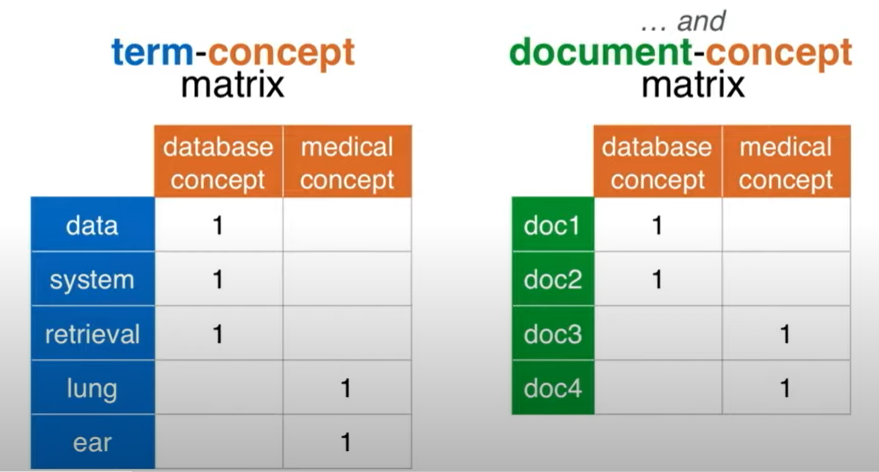

Comme affiché sur la figure ci-dessus, LSI découpe notre premiere matrice en deux matrices : 

*   Term-concept matrix
*   Document-concept matrix

***Mais comment ça marche ?***


---




**1.   Normalisation ( avec tf-idf ou entropie)**

**2.   Décomposition avec SVD**

*SVD (Singular Value Decomposition)* décompose notre matrice initiale en trois matrices = (document x termes) * ( concepts x concepts) * (terms x concepts) 

**3. pproximation de la matrice Initiale sur k dimensions avec k = min(n,m)**

*n : nombre des termes* , *m : nombre des documents*

In [ ]:
type(corpus)

list

In [ ]:
from gensim.models import lsimodel

In [ ]:
lsi_model = gensim.models.lsimodel.LsiModel(corpus=corpus, id2word=id2word, num_topics=10,chunksize=100)

On remarque que le nombre de topic peut etre inferieur de num_topics en raison de facteurs

In [ ]:
pprint(lsi_model.print_topics())
doc_lsi = lsi_model[corpus]

[(0,
  '1.000*"ax_ax" + 0.016*"ax" + 0.002*"di_di" + 0.001*"bhjn" + 0.001*"wm_wm" + '
  '0.001*"part" + 0.001*"eqtm" + 0.001*"would" + 0.001*"wwiz" + '
  '0.001*"max_ax"'),
 (1,
  '0.282*"say" + 0.210*"go" + 0.189*"know" + 0.184*"would" + 0.176*"people" + '
  '0.153*"see" + 0.147*"get" + 0.147*"make" + 0.144*"may" + 0.144*"think"'),
 (2,
  '-0.370*"say" + 0.303*"file" + -0.246*"go" + 0.171*"program" + -0.171*"know" '
  '+ 0.162*"image" + 0.161*"available" + 0.160*"use" + -0.145*"people" + '
  '0.145*"include"')]


In [ ]:
lsi_model.show_topic(0, topn=10)


[('ax_ax', 0.9998613775796696),
 ('ax', 0.016398894039857486),
 ('di_di', 0.0015517990246140746),
 ('bhjn', 0.0007571349550297572),
 ('wm_wm', 0.0006930505807726678),
 ('part', 0.0005871946164274596),
 ('eqtm', 0.0005852600237436688),
 ('would', 0.0005711668144182901),
 ('wwiz', 0.000556993716243871),
 ('max_ax', 0.0005332924173272914)]

In [ ]:
lsi_model.print_topic(1, topn=5)

'0.283*"say" + 0.210*"go" + 0.189*"know" + 0.184*"would" + 0.176*"people"'

*HDP MODEL texte en gras*

In [ ]:
Hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus, id2word=id2word)
pprint(Hdp_model.print_topics())


[(0,
  '0.008*would + 0.007*write + 0.007*say + 0.006*line + 0.006*know + '
  '0.006*people + 0.005*get + 0.005*think + 0.005*go + 0.005*make'),
 (1,
  '0.009*write + 0.009*line + 0.008*would + 0.006*get + 0.006*say + '
  '0.006*think + 0.006*make + 0.006*know + 0.005*go + 0.005*people'),
 (2,
  '0.661*ax_ax + 0.014*ax + 0.002*di_di + 0.001*wm_wm + 0.001*bhjn + '
  '0.000*part + 0.000*wwiz + 0.000*eqtm + 0.000*would + 0.000*bxn_bxn'),
 (3,
  '0.008*line + 0.007*write + 0.005*would + 0.004*article + 0.004*get + '
  '0.004*make + 0.003*say + 0.003*people + 0.003*go + 0.003*work'),
 (4,
  '0.005*line + 0.005*write + 0.004*would + 0.004*use + 0.003*get + 0.003*also '
  '+ 0.003*think + 0.003*thank + 0.003*article + 0.003*window'),
 (5,
  '0.004*line + 0.003*would + 0.003*say + 0.003*write + 0.003*get + '
  '0.003*think + 0.002*make + 0.002*thank + 0.002*know + 0.002*go'),
 (6,
  '0.003*line + 0.003*people + 0.003*would + 0.002*write + 0.002*know + '
  '0.002*say + 0.002*think + 0.002*score

In [ ]:
Hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus, id2word=id2word)


For implementing HDP in Gensim, we need to train corpus and dictionary (as did in the above examples while implementing LDA and LSI topic models) HDP topic model that we can import from gensim.models.HdpModel. Here also we will implement HDP topic model on 20Newsgroup data and the steps are also same.

For our corpus and dictionary (created in above examples for LSI and LDA model), we can import HdpModel as follows −

In [ ]:
pprint(Hdp_model.print_topics())


[(0,
  '0.008*would + 0.007*write + 0.007*say + 0.007*line + 0.006*people + '
  '0.006*know + 0.005*get + 0.005*think + 0.005*go + 0.005*make'),
 (1,
  '0.010*line + 0.009*write + 0.007*would + 0.006*get + 0.005*know + '
  '0.005*think + 0.005*say + 0.005*use + 0.005*go + 0.005*article'),
 (2,
  '0.614*ax_ax + 0.013*ax + 0.002*di_di + 0.001*would + 0.001*line + '
  '0.001*wm_wm + 0.001*get + 0.001*write + 0.001*part + 0.001*bhjn'),
 (3,
  '0.007*line + 0.006*write + 0.005*would + 0.004*get + 0.004*say + 0.004*use '
  '+ 0.003*know + 0.003*article + 0.003*time + 0.003*think'),
 (4,
  '0.006*line + 0.005*write + 0.004*would + 0.004*say + 0.003*game + '
  '0.003*know + 0.003*team + 0.003*go + 0.003*think + 0.003*get'),
 (5,
  '0.006*line + 0.004*write + 0.004*would + 0.004*get + 0.003*know + 0.003*say '
  '+ 0.003*thank + 0.002*problem + 0.002*need + 0.002*work'),
 (6,
  '0.004*write + 0.004*line + 0.003*see + 0.003*get + 0.003*would + '
  '0.003*think + 0.002*people + 0.002*come + 0.002*

Comparaison entre LDA, LSI , HDP avec coherence score.

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lsi_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [ ]:
# Compute Coherence Score
coherence_model_Hdp = CoherenceModel(model=Hdp_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_Hdp = coherence_model_Hdp.get_coherence()
print('\nCoherence Score HDP: ', coherence_Hdp)

# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score LSI: ', coherence_lsi)

coherense_lda = 0.47609472603340575
print('\nCoherence Score LDA : ', coherence_lda)


Coherence Score HDP:  0.5065726502187723

Coherence Score LSI:  0.5010136939333293

Coherence Score LD:  0.5010136939333293


In [ ]:
from collections import Counter
topics = lsi_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Affiner le modéle avec tf-idf

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)


In [ ]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
lsi_model2 = models.LsiModel(corpus_tfidf, id2word=id2word, num_topics=2)  # initialize an LSI transformation with tfi_idf
corpus_lsi = lsi_model2[corpus_tfidf] 

In [ ]:
Hdp_model2 = gensim.models.hdpmodel.HdpModel(corpus_tfidf, id2word=id2word)  # initialize an HDP transformation with tf_idf
corpus_Hdp = Hdp_model2[corpus_tfidf] 


In [ ]:
# Compute Coherence Score HDP
coherence_model_Hdp = CoherenceModel(model=Hdp_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_Hdp = coherence_model_Hdp.get_coherence()
print('\nCoherence Score HDP2: ', coherence_Hdp)

# Compute Coherence Score LSI
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score LSI2: ', coherence_lsi)

coherense_lda = 0.47609472603340575
coherense_lda2 = 0.33362071419709394

print('\nCoherence Score LDA: ', coherense_lda)
print('\nCoherence Score LDA2: ',coherense_lda2)


Coherence Score HDP2:  0.6532286488542107

Coherence Score LSI2:  0.3963227928981352

Coherence Score LDA:  0.47609472603340575

Coherence Score LDA2:  0.33362071419709394
